In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd

from numpy import fft
import metrolopy as uc


/tmp/ipykernel_96974/3113279661.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


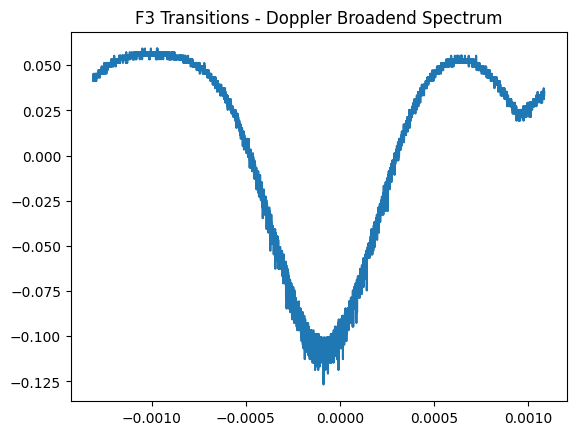

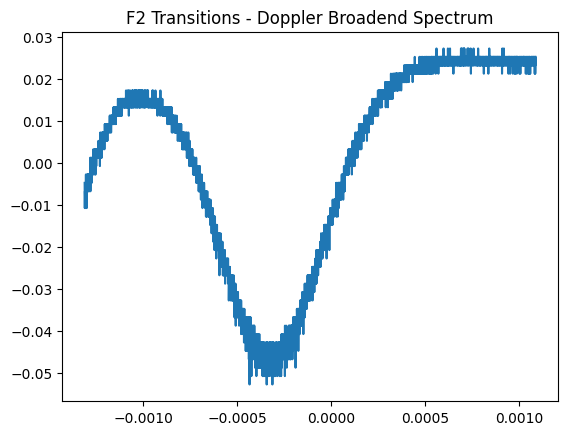

In [2]:
#3 Doppler Broadend Spectrum
#F3 Transitions
plt.title('F3 Transitions - Doppler Broadend Spectrum')
sig_broad_df = pd.read_csv("DSP_01.CSV", header=0)
plt.plot(sig_broad_df['[s]'], sig_broad_df['CH2[V]'])

err_broad_df = pd.read_csv("DSP_02.CSV", header=0)
#plt.plot(err_broad_df['[s]'], err_broad_df['CH3[V]'])
plt.show()

#F2 Transitions
plt.title('F2 Transitions - Doppler Broadend Spectrum')
sig_broad_df = pd.read_csv("DSP_03.CSV", header=0)
plt.plot(sig_broad_df['[s]'], sig_broad_df['CH2[V]'])

err_broad_df = pd.read_csv("DSP_04.CSV", header=0)
#plt.plot(err_broad_df['[s]'], err_broad_df['CH3[V]'])
plt.show()

/tmp/ipykernel_96974/1307024823.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


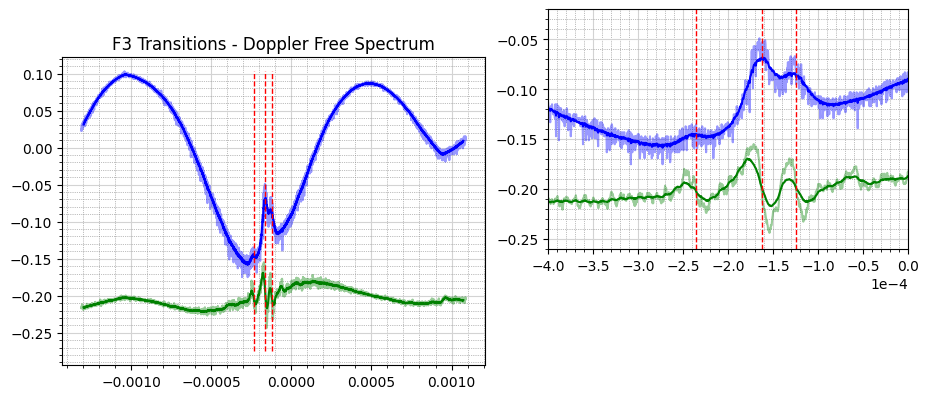

In [12]:
#4 Doppler Free Spectrum
#F3 Transitions

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
for ax in (ax1, ax2):
    sig_df = pd.read_csv("DSP_07.CSV", header=0)
    ax.plot(sig_df['[s]'], sig_df['CH2[V]'],alpha=0.4,color='blue')

    #averaging / initial plotting
    n = 71
    offset = n//2
    ave = np.ones(n)
    ave[offset] += 10
    ave *= 1/np.sum(ave)

    ave_sig = np.convolve(sig_df['CH2[V]'],ave,mode='valid')
    ax.plot(sig_df['[s]'][offset:6000-offset], ave_sig,color='blue')

    err_df = pd.read_csv("DSP_08.CSV", header=0)
    ax.plot(err_df['[s]'], err_df['CH3[V]']-0.2,alpha=0.4,color='green')

    ave_err = np.convolve(err_df['CH3[V]'],ave,mode='valid')
    ax.plot(err_df['[s]'][offset:6000-offset], ave_err-0.2,color='green')

    #not used
    zeros = []
    sub_zero = ave_err[0] < 0
    for i, err_point in enumerate(ave_err):
        if ((err_point < 0) != sub_zero):
            sub_zero = not sub_zero
            zeros.append(err_df['[s]'][i])

    zeros = [-0.000236, -0.000162, -0.000124]
    for i,x in enumerate(zeros):
        
        xs = x*np.ones(2)
        ys = [min(sig_df['CH2[V]'])-0.1,max(sig_df['CH2[V]'])]
        ax.plot(xs,ys,linestyle='--', linewidth=1 ,c='red')

    ax.grid()
    ax.minorticks_on()
    ax.grid(which='major', color='lightgrey', linewidth=0.8)
    ax.grid(which='minor', color='grey', linestyle= ':', linewidth=0.5)

ax1.set_title('F3 Transitions - Doppler Free Spectrum')
ax2.ticklabel_format(style='sci',scilimits=(-3,4),axis='both')
ax2.set_xlim(-0.0004,0.0)
ax2.set_ylim(-0.26,-0.02)
# Set the position of ax2. The values are [left, bottom, width, height].
ax2.set_position([0.53, 0.4, 0.3, 0.6]) 
fig.show()

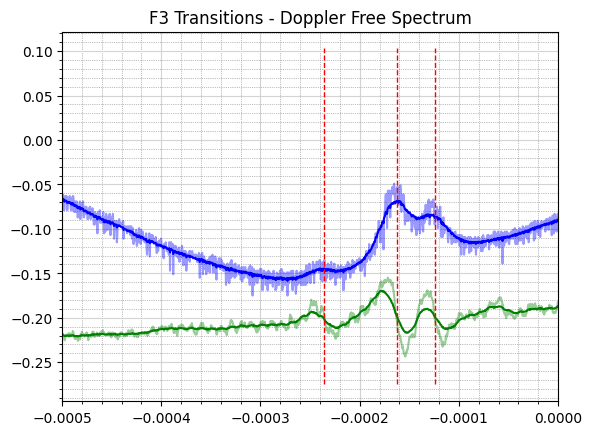

[-1.282e-04  2.830e-05  1.215e-04]


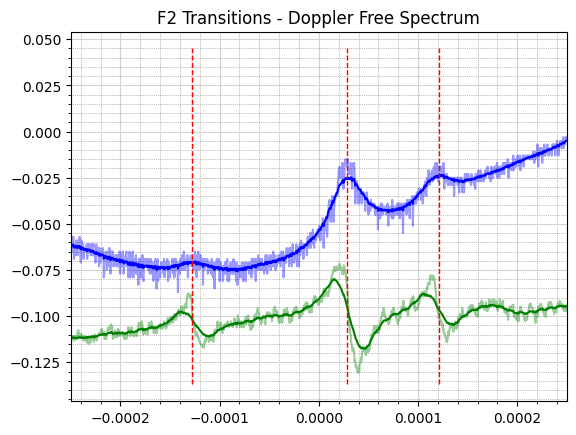

y = p(1) + p(2)*x

best fit parameters:
p(1) = 3.842 305 691 4(66)e+8
p(2) = -8.486(26)e+5



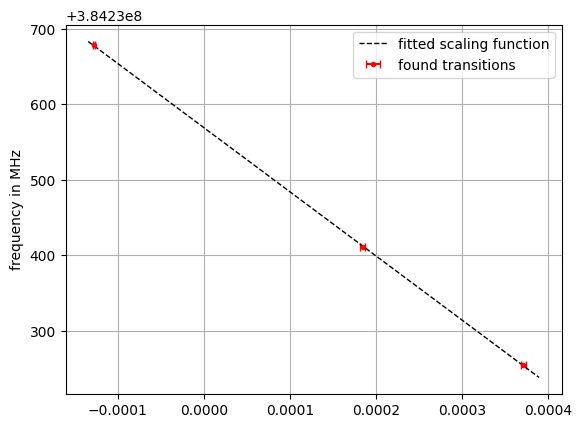

Found frequencies:  [3.84230678e+08 3.84230412e+08 3.84230254e+08]
Uncertanties:  [1.12553284 2.53523898 2.6698375 ]
Hyperfine differenes: 265.6118 real: 266.65 158.179 real: 156.947
Uncertanties: [2.773853077003178, 2.8973878713075334]


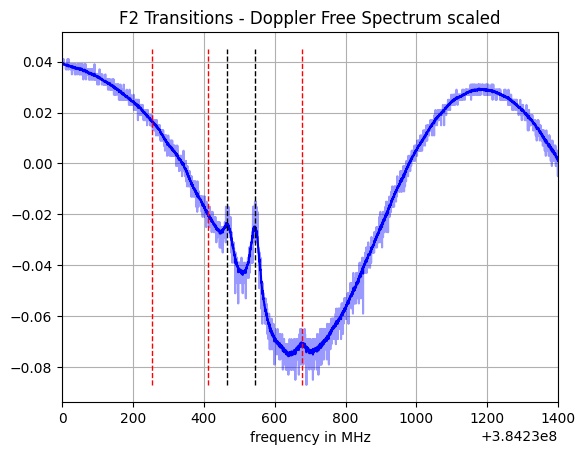

In [41]:
#4 Doppler Free Spectrum
#F3 Transitions
plt.title('F3 Transitions - Doppler Free Spectrum')
sig_df = pd.read_csv("DSP_07.CSV", header=0)
plt.plot(sig_df['[s]'], sig_df['CH2[V]'],alpha=0.4,color='blue')

#averaging / initial plotting
n = 71
offset = n//2
ave = np.ones(n)
ave[offset] += 10
ave *= 1/np.sum(ave)

ave_sig = np.convolve(sig_df['CH2[V]'],ave,mode='valid')
plt.plot(sig_df['[s]'][offset:6000-offset], ave_sig,color='blue')

err_df = pd.read_csv("DSP_08.CSV", header=0)
plt.plot(err_df['[s]'], err_df['CH3[V]']-0.2,alpha=0.4,color='green')

ave_err = np.convolve(err_df['CH3[V]'],ave,mode='valid')
plt.plot(err_df['[s]'][offset:6000-offset], ave_err-0.2,color='green')

#not used
zeros = []
sub_zero = ave_err[0] < 0
for i, err_point in enumerate(ave_err):
    if ((err_point < 0) != sub_zero):
        sub_zero = not sub_zero
        zeros.append(err_df['[s]'][i])

zeros = [-0.000236, -0.000162, -0.000124]
for i,x in enumerate(zeros):
    
    xs = x*np.ones(2)
    ys = [min(sig_df['CH2[V]'])-0.1,max(sig_df['CH2[V]'])]
    plt.plot(xs,ys,linestyle='--', linewidth=1 ,c='red')

plt.grid()
plt.minorticks_on()
plt.grid(which='major', color='lightgrey', linewidth=0.8)
plt.grid(which='minor', color='grey', linestyle= ':', linewidth=0.5)
plt.xlim(-0.0005,0.0)
plt.show()

#F2 Transitions
#averaging / initial plotting
plt.title('F2 Transitions - Doppler Free Spectrum')
sig_df = pd.read_csv("DSP_09.CSV", header=0)
plt.plot(sig_df['[s]'], sig_df['CH2[V]'],alpha=0.4,color='blue')

ave_sig = np.convolve(sig_df['CH2[V]'],ave,mode='valid')
plt.plot(sig_df['[s]'][offset:6000-offset], ave_sig, color='blue')

err_df = pd.read_csv("DSP_10.CSV", header=0)
plt.plot(err_df['[s]'], err_df['CH3[V]']-0.1,alpha=0.4,color='green')

ave_err = np.convolve(err_df['CH3[V]'],ave,mode='valid')
plt.plot(err_df['[s]'][offset:6000-offset], ave_err-0.1,color='green')

#not used
zeros = []
sub_zero = ave_err[0] < 0
for i, err_point in enumerate(ave_err):
    if (err_point < 0) != sub_zero:
        sub_zero = not sub_zero
        x1 = err_df['[s]'][i]
        x2 = err_df['[s]'][i+1]
        y1 = ave_err[i-1]
        y2 = ave_err[i]
        zeros.append(x1-y1/(y2-y1)*(x2-x1))

zeros = np.array([-0.0001282, 0.0000283, 0.0001215])
print(zeros)
for i,x in enumerate(zeros):
    xs = x*np.ones(2)
    ys = [min(sig_df['CH2[V]'])-0.05,max(sig_df['CH2[V]'])]
    plt.plot(xs,ys,linestyle='--',linewidth=1, c='red')

    
plt.xlim(-0.00025,0.00025)
plt.grid()
plt.minorticks_on()
plt.grid(which='major', color='lightgrey', linewidth=0.8)
plt.grid(which='minor', color='grey', linestyle= ':', linewidth=0.5)
plt.show()


# finding the transitions
zeros[1] = zeros[0]+2*(zeros[1]-zeros[0])
zeros[2] = zeros[0]+2*(zeros[2]-zeros[0])
s_zero = np.array([0.000001,2*np.sqrt(2*0.000001**2),2*np.sqrt(2*0.000001**2)])

#real frequencies
d23 = 266.650
d12 = 156.947
f3 = 384.2304844685e6 + 193.7408
freqs = np.array([f3,f3-d23,f3-d23-d12])

# linear scaling function
fit = uc.PolyFit(zeros,freqs,deg=1)
print(fit)

b = 3.8423056914e+8 #fit.p[0].value
s_b = 0.66 #fit.p[0].u
a = -848600 #fit.p[1].value
s_a = 2600 #fit.p[1].u

plt.errorbar(zeros,freqs,xerr = s_zero, fmt='.', color='red',capsize=3, label='found transitions')
x = np.array([zeros[0]*1.05, zeros[2]*1.05])
plt.plot(x,a*x+b, linewidth=1, linestyle='--', label='fitted scaling function', color='black')
plt.ylabel('frequency in MHz')
plt.grid()
plt.legend()
plt.show()

# ax + b
s_transitions = np.sqrt((a*s_zero)**2 + (s_a*zeros)**2 + (s_b)**2)
transitions = zeros*a + b
print("Found frequencies: ", transitions)
print("Uncertanties: ", s_transitions)
diff = [transitions[0]-transitions[1], transitions[1]-transitions[2]]
s_diff = [np.sqrt(s_transitions[1]**2+s_transitions[0]**2),np.sqrt(s_transitions[2]**2+s_transitions[0]**2)]
print("Hyperfine differenes:", round(diff[0],4), "real:",d23,round(diff[1],4), "real:",d12)
print("Uncertanties:", s_diff)
#d23 = 266.650
#d12 = 156.947


# replotting with true scale
plt.title('F2 Transitions - Doppler Free Spectrum scaled')
plt.plot(sig_df['[s]']*a + b, sig_df['CH2[V]'],alpha=0.4,color='blue')
plt.plot(sig_df['[s]'][offset:6000-offset]*a + b, ave_sig,color='blue')
#plt.plot(err_df['[s]']*a + b, err_df['CH3[V]']-0.1)
#plt.plot(err_df['[s]'][offset:6000-offset]*a + b, ave_err-0.1)
for i,x in enumerate(zeros):
    xs = x*np.ones(2)
    ys = [min(sig_df['CH2[V]']),max(sig_df['CH2[V]'])]
    plt.plot(xs*a + b,ys,linestyle='--',linewidth=1, c='red')
    
for i,x in enumerate([0.0000283, 0.0001215]):
    xs = x*np.ones(2)
    ys = [min(sig_df['CH2[V]']),max(sig_df['CH2[V]'])]
    plt.plot(xs*a + b,ys,linestyle='--',linewidth=1, c='black')
    

plt.xlim(30000+3.842e8,31400+3.842e8)
plt.xlabel('frequency in MHz')
plt.grid()
plt.show()


19 19 19
10 10 10


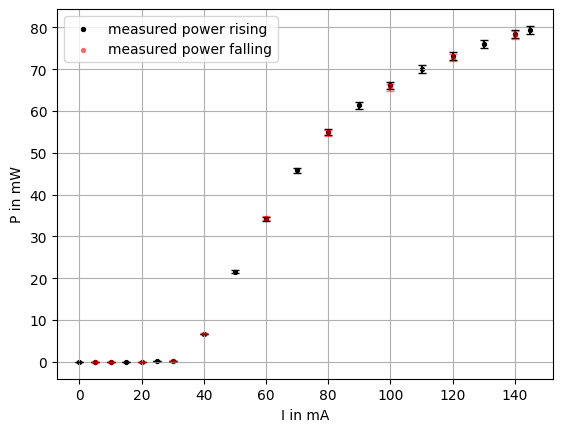

In [5]:
#1 Laser Power - Threshold current

I_mA = np.array([0,5,10,15,20,25,30,40,50,60,70,80,90,
                 100,110,120,130,140,145])

P_mW = np.array([210e-6, 8.96e-3, 20.93e-3, 35.6e-3, 
                 55.5e-3, 93.2e-3, 182.4e-3, 5.02, 16.20, 
                 25.68, 34.4, 41.2, 46.0, 49.6, 52.5, 54.9, 
                 57.0, 58.8, 59.5])

#Messgerät zeigt 75% des wahren Wertes an
P_mW *= 4/3

#Ablese- bzw. Schwankungsunsicherheit
s_P_mW = np.array([20e-6, 0.02e-3, 0.02e-3, 0.01e-3, 0.01e-3, 
                   0.01e-3, 0.01e-3, 0.01, 0.01, 0.01, 0.1, 
                   0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

s_P_mW *= 4/3

#Dazu kommen kommt Unsicherheit des Messgeräts von 1% und
# ca. 0.8% Unsicherheit durch Platzierung des Messgeräts
s_P_mW = np.sqrt(s_P_mW**2 + (0.01*P_mW)**2 + (0.008*P_mW)**2)

#sanity chek
print(len(I_mA), len(P_mW), len(s_P_mW))

I_mA_bkw = np.array([140,120,100,80,60,40,30,20,10,5])

P_mW_bkw = np.array([58.6, 54.6, 49.3, 41.0, 25.8, 5.09, 
                     181.5e-3, 55.9e-3, 20.96e-3, 8.88e-3])

#Messgerät zeigt 75% des wahren Wertes an
P_mW_bkw *= 4/3

s_P_mW_bkw = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.01, 
              0.02e-3, 0.02e-3, 0.02e-3, 0.02e-3])

s_P_mW_bkw *= 4/3

s_P_mW_bkw = np.sqrt(s_P_mW_bkw**2 + (0.01*P_mW_bkw)**2 + (0.008*P_mW_bkw)**2)

print(len(I_mA_bkw), len(P_mW_bkw), len(s_P_mW_bkw))

plt.scatter(I_mA, P_mW, s=8, label='measured power rising', color='black')
plt.errorbar(I_mA, P_mW, yerr=s_P_mW, fmt='none', capsize=3, color='black')

plt.scatter(I_mA_bkw, P_mW_bkw, s=8, label='measured power falling', color='red', alpha=0.5)
plt.errorbar(I_mA_bkw, P_mW_bkw, yerr=s_P_mW_bkw, fmt='none', capsize=3, color='red', alpha=0.5)


#plt.xlim(-5,55)
#plt.ylim(-3,25)
plt.xlabel('I in mA')
plt.ylabel('P in mW')
plt.grid()
plt.legend()
#plt.yscale('log')

<h2> Absorption </h2>
$$I = I_0\cdot e^{-aL}$$ 
$$ a = -\frac{\ln(\frac{I}{I_0})}{L}$$


0.8080397554958193 0.005598208253586439
0.04262880386502528 0.0025422429670799817
1490.9386843893892


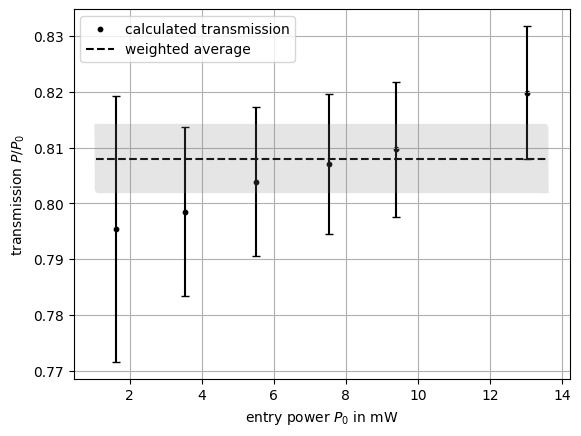

In [6]:
#5 Absorption

P_mW_front = np.array([9.77, 7.04, 5.65, 4.13, 2.66, 1.217])
P_mW_front *= 4/3
s_P_mW_front = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.001])
s_P_mW_front *= 4/3
s_P_mW_front = np.sqrt(s_P_mW_front**2 + (0.01*P_mW_front)**2 + (4/3*0.02)**2)

P_mW_back = np.array([8.01, 5.70, 4.56, 3.32, 2.124, 0.968])
P_mW_back *= 4/3
s_P_mW_back = np.array([0.01, 0.01, 0.01, 0.01, 0.001, 0.001])
s_P_mW_back *= 4/3
s_P_mW_back = np.sqrt(s_P_mW_back**2 + (0.01*P_mW_back)**2 + (4/3*0.02)**2)

frac = P_mW_back/P_mW_front
s_frac = np.sqrt((s_P_mW_back/P_mW_front)**2 + (P_mW_back/P_mW_front**2*s_P_mW_front)**2)

#Gewichtetes mittel
ave = np.average(frac, weights = 1/s_frac**2)
s_ave = 1/np.linalg.norm(1/s_frac)
print(ave, s_ave)

#for uncertainty display
x = np.linspace(-0.5+min(P_mW_front),max(P_mW_front)+0.5,1000)
y = s_ave*np.tile([1,-1],500)+ave


#Absorption coefficient
L = 5.00 #in cm
s_L = 0.25
a = -np.log(ave)/L
s_a = np.sqrt((s_ave/(ave*L))**2 + (np.log(ave)/L**2*s_L)**2)
print(a, s_a)

#Beam intensity in the middle in mW/cm^2 for first Data Point
I_middle = P_mW_front[0]*np.exp(-a*L/2)/(np.pi*0.05**2)
print(I_middle)

plt.scatter(P_mW_front, frac, s=10, color='black', label='calculated transmission')
plt.errorbar(P_mW_front, frac, yerr=s_frac, fmt='none', capsize=3, color='black')
plt.plot([-0.55+min(P_mW_front),max(P_mW_front)+0.55],[ave,ave], color='black', linestyle='--', label='weighted average')
plt.plot(x,y,color='grey',linewidth=5,alpha=0.2)
plt.ylabel('transmission $P/P_0$')
plt.xlabel('entry power $P_0$ in mW')
plt.grid()
plt.legend()
plt.show()

In [7]:
# stuff
N = 1.443e-22 #g/atom
rho = 1.53 #g/cm^3
s = 1.356e-9#cm^2/atom
N_0 = rho/N * np.pi*0.1**2*5 #atom/cm^3 * cm^3 = atoms
N_0*s/(np.pi*0.1**2*5)

14377546777546.781

False